# Датасет ирисы Фишера
## Подготовка датасета


Импортируем датасет с ирисами из *skrlearn.datasets*. Столбцы *sl*, *sw*, *pl*, *pw* - это некоторые параметры различных ирисов, а *target* - это тип ириса.

In [2]:
from sklearn.datasets import load_iris
import numpy  as np
import pandas as pd

iris = load_iris()
iris_pd=pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
iris_pd = iris_pd.rename(columns={'sepal length (cm)': 'sl', 'sepal width (cm)': 'sw', 'petal length (cm)': 'pl', 'petal width (cm)': 'pw'})

print(iris_pd)
print(iris_pd.describe())

      sl   sw   pl   pw  target
0    5.1  3.5  1.4  0.2     0.0
1    4.9  3.0  1.4  0.2     0.0
2    4.7  3.2  1.3  0.2     0.0
3    4.6  3.1  1.5  0.2     0.0
4    5.0  3.6  1.4  0.2     0.0
..   ...  ...  ...  ...     ...
145  6.7  3.0  5.2  2.3     2.0
146  6.3  2.5  5.0  1.9     2.0
147  6.5  3.0  5.2  2.0     2.0
148  6.2  3.4  5.4  2.3     2.0
149  5.9  3.0  5.1  1.8     2.0

[150 rows x 5 columns]
               sl          sw          pl          pw      target
count  150.000000  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333    1.000000
std      0.828066    0.435866    1.765298    0.762238    0.819232
min      4.300000    2.000000    1.000000    0.100000    0.000000
25%      5.100000    2.800000    1.600000    0.300000    0.000000
50%      5.800000    3.000000    4.350000    1.300000    1.000000
75%      6.400000    3.300000    5.100000    1.800000    2.000000
max      7.900000    4.400000    6.900000    2.500000    2.00000

# Разведочный анализ данных

### Построить диаграмму Тьюки, оценить диапазон изменения данных.

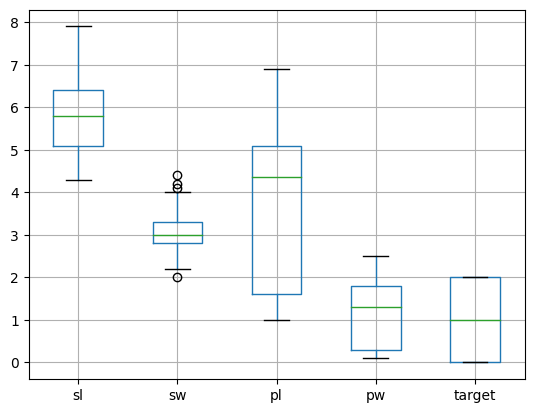

In [3]:
import matplotlib.pyplot as plt

iris_pd.boxplot()
plt.show()

Значения всех переменных сравнимы по величине, но находятся в нескольких разных диапазонах и имеют разный разброс. Также стоит отметить, что для значений sw имеем большое количество выбросов.

### Проанализировать корреляционные зависимости между исследуемыми переменными. Необходимо построить тепловую карту.

              sl        sw        pl        pw    target
sl      1.000000 -0.117570  0.871754  0.817941  0.782561
sw     -0.117570  1.000000 -0.428440 -0.366126 -0.426658
pl      0.871754 -0.428440  1.000000  0.962865  0.949035
pw      0.817941 -0.366126  0.962865  1.000000  0.956547
target  0.782561 -0.426658  0.949035  0.956547  1.000000


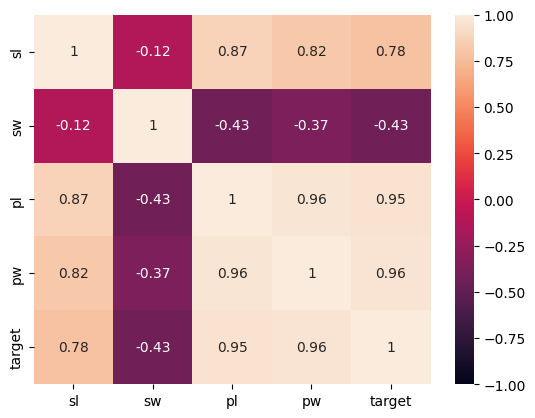

In [4]:
import seaborn as sns

corr_matr = iris_pd.corr()
print(corr_matr)

sns.heatmap(corr_matr, annot= True, vmin=-1, vmax=1)
plt.show()

Практически все переменные имеют высокие линейные связи друг с другом, кроме пар содержащих sw. Еще можно обратить внимание, что парные корреляции отдельных переменных со всеми остальными имеют похожие значения.

### Рассчитать частные коэффициенты корреляции, сравнить их со значениями парных коэффициентов корреляции. Необходимо построить тепловую карту.

              sl        sw        pl        pw    target
sl      1.000000  0.610735  0.723756 -0.220409 -0.159156
sw      0.610735  1.000000 -0.565057  0.336649 -0.055676
pl      0.723756 -0.565057  1.000000  0.578470  0.316796
pw     -0.220409  0.336649  0.578470  1.000000  0.472174
target -0.159156 -0.055676  0.316796  0.472174  1.000000


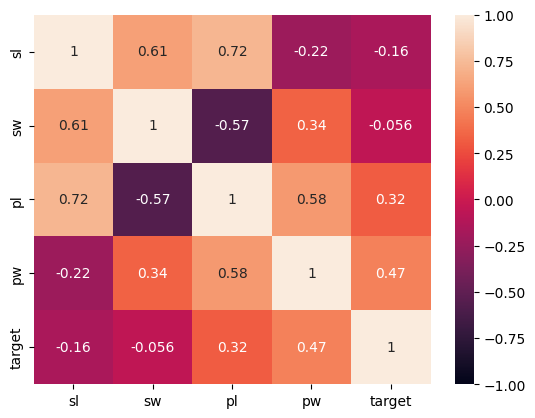

In [5]:
import pingouin

pcorr_matr = iris_pd.pcorr()
print(pcorr_matr)

sns.heatmap(pcorr_matr, annot= True, vmin=-1, vmax=1)
plt.show()

По сравнению с матрицей парных корреляций частные корреляции отдельных переменных со всеми остальными значительно различаются, в том числе могут менять знак. Можно отметить, что тип цветка, судя по значениям коэффициентов частной корреляции, в большей мере определяется параметрами *pl* и *pw*.

### Проверить предположение о распределении признаков по нормальному закону критерием Колмогорова-Смирнова. Необходимо рассчитать значения статистик.

In [6]:
import scipy.stats

kstest_res = [ scipy.stats.kstest(iris_pd.iloc[:,i], 'norm') for i in range(len(iris_pd.iloc[0]))]
for elem in kstest_res:
    print(f'Значение статистики: {elem.statistic}, pvalue: {elem.pvalue}')

Значение статистики: 0.999991460094529, pvalue: 0.0
Значение статистики: 0.9794298858198347, pvalue: 1.9343513094431716e-253
Значение статистики: 0.8765328487477231, pvalue: 1.4044248603466388e-136
Значение статистики: 0.5459263761057697, pvalue: 1.876499271371568e-42
Значение статистики: 0.5080114127352096, pvalue: 2.0970191237053004e-36


По результатам критерия Колмогорова-Смирнова данные столбцы противоречат предположению о нормальности закона распределения данных величин, поскольку значение pvalue в каждой из них практически нулевое.

### Сделать выводы о степени однородности данных, силе зависимости между переменными, виде функции распределения, наиболее информативных переменных.

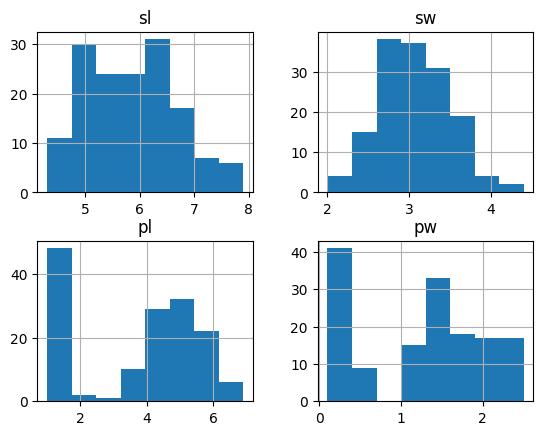

In [7]:
iris_pd.iloc[:,:-1].hist(bins = 8)
plt.show()

Построим гистограммы имеющихся данных. По ним видно, что оценки законов распределения данных выборок весьма различны и отличаются от нормального закона распределения, что подтвердил критерий Колмогорова-Смирнова. Заметим, что характер оценок дифференциального закона распределения для *pl* и *pw* визуально похож.

Судя по корреляционным коэффициентам, параметры ирисов имеют, как минимум, небольшую линейную связь. Есть связи как прямые так и обратные и их силы различны. Смотря на коэффициенты частной корреляции, можно предположить, что наиболее информативными для определения типа ириса являются параметры *pl* и *pw*, поскольку эти параметры имеют наибольшие оценки частной корреляции с типом цветка.

## Построение регрессии

### Определить входные и выходные переменные. Построить парную регрессию и множественную регрессию (Используем sklearn).

В нашем наборе данных прикладной задачей было бы определение типа цветка ирисов по его параметрам. Поэтому, в качестве входных переменных, можно взять параметры цветков *sl*, *sw*, *pl*, *pw*, а выходной переменной выбрать тип цветка.

In [32]:
from sklearn import linear_model

def pair_regress(data_pd, x_name, y_name):
    x = data_pd[x_name].values.reshape(-1, 1)
    y = data_pd[y_name].values.reshape(-1, 1)

    reg = linear_model.LinearRegression()
    reg.fit(x,y)

    return reg
    
reg = dict()

for column in list(iris_pd.columns):
    reg[column] = pair_regress(iris_pd, column, 'target')

iris_y = iris_pd[column].values.reshape(-1, 1)
for column in reg:
    iris_x = iris_pd[column].values.reshape(-1, 1)
    iris_y_pred = reg[column].predict(iris_x)
    plt.scatter(iris_x, iris_y)
    plt.plot(iris_x, iris_y_pred)
    plt.show()


'''
iris_y_pred = reg.predict(iris_x)

plt.scatter(iris_x, iris_y)
plt.plot(iris_x, iris_y_pred)
plt.show()

'''

{'sl': LinearRegression(), 'sw': LinearRegression(), 'pl': LinearRegression(), 'pw': LinearRegression(), 'target': LinearRegression()}
sl
sw
pl
pw
target


'\niris_y_pred = reg.predict(iris_x)\n\nplt.scatter(iris_x, iris_y)\nplt.plot(iris_x, iris_y_pred)\nplt.show()\n\n'

[-0.19486794668928775, 2.592297026149656]
[0.77421249]


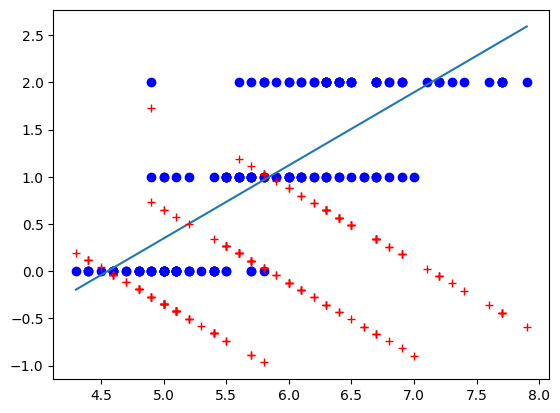

In [8]:
from sklearn import linear_model


'''
x = []
for i in range(len(iris_pd.iloc[0]) - 1):
    x.append(iris_pd.iloc[:,i].tolist())
'''

inp = [ iris_pd.iloc[:,0].tolist()]
output = iris_pd['target'].tolist()

data = [ [inp[j][i] for j in range(len(inp))] for i in range(len(inp[0])) ]

lin_pred = lambda b, x: b[0] + x * b[1]

reg = linear_model.LinearRegression()
reg.fit(data, output)
b = [reg.intercept_, reg.coef_[0]]

x = [min(inp[0]), max(inp[0])]
out_pred = [ lin_pred(b, x[i]) for i in range(len(x))]
residues = [ output[i] - lin_pred(b, inp[0][i])  for i in range(len(output))]

print(out_pred)
print(reg.coef_)

plt.plot(inp[0], output, 'bo')
plt.plot(x, out_pred)
plt.plot(inp[0], residues, 'r+')
plt.show()


###  Сравнить результаты парной и множественной регрессии. В отчёт включить график с предсказанными значения (на одном графике), график предсказанных значений и остатков (на одном графике), и значения множественного коэффициента корреляции, коэффициента детерминации, скорректированного коэффициента детерминации и стандартной ошибки. Выбрать наиболее адекватную модель (в отчёте написать обоснование). 